<a href="https://colab.research.google.com/github/vivek16pawar/EDA-CAPSTONE/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                 EDA OF AIR BNB

 Before deep-diving straight into the problem solution, we need to create a roadmap which we will be referring to throughout this exploratory data analysis.

 Air Bnb offers you someone’s home as a place to stay instead of a hotel

 The objective of this project is to deliver insights to understand host,area,pricing and customer choise for booking. Tracking the performance of your Airbnb listing is just as important as attracting new guests and increasing your bookings. It’s a quantifiable way of keeping an eye on your financial situation and overcoming key issues.Analysing this data will help to manage the social media promotional campaigns.This dataset contains details of different host in NYC and reviews from different users.
 Discussion of Google play store dataset will involve various steps such as
 1. Loading the data into the data frame
 2. Cleaning the data
 3. Extracting statistics from the dataset
 4. Exploratory analysis and visualizations
 5. Questions that can be asked from the dataset
 6. Conclusion

# Step 1 : Loading the data into dataframe

In [1]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

In [2]:
#Connecting to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the CSV file and getting data onboard
file_path = '/content/drive/MyDrive/Module 1/EDA CAPSTON/Airbnb NYC 2019.csv'

In [4]:
#Defining the dataframe
df = pd.read_csv(file_path)

# Step 2: Understanding and Cleaning the data

In [5]:
#Checking the head of the data
df.head()

id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]

In [6]:
#checking the tail of the data
df.tail(5)

id  ... availability_365
48890  36484665  ...                9
48891  36485057  ...               36
48892  36485431  ...               27
48893  36485609  ...                2
48894  36487245  ...               23

[5 rows x 16 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
#Checking the shape of the dataset, numbers of rows and columns
print(f'The shape of the Air Bnb Dataset is {df.shape}')
print(f'The Number of Rows are {df.shape[0]}, where The Number of Columns are {df.shape[1]} ')

The shape of the Air Bnb Dataset is (48895, 16)
The Number of Rows are 48895, where The Number of Columns are 16 


In [9]:
#Finding out Count of null value in rows of columns
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Now we will remove irrelevent and insignificant columns from the dataset. Here id, host_name, last_review columns are irrelevent for us. For ID pandas/numpy gives indices and name are drop beacuse we are not analysing individual

In [10]:
#dropping id, host_name, last_review columns
df.drop(['id', 'host_name','last_review'], axis=1, inplace=True)

In [11]:
#checking the columns
df.head(2)

name  ...  availability_365
0  Clean & quiet apt home by the park  ...               365
1               Skylit Midtown Castle  ...               355

[2 rows x 13 columns]

Reading above data we can see plenty of null values. We have null values for review per months as there was no reviews made for this hostings
so we will fill this Nan with 0. 

In [12]:
# Replacing the Nan Values with the Zeros in reviews per month column 
df['reviews_per_month'].fillna(0,inplace=True)


In [13]:
#Checking the DataFrame after the replacing the null values with zeros
df.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

Now let find some outliers and deal with it

An outlier is a data point that differs significantly from other observations. This variation is due to variability in the measurement or error while data entry.
We will find outliers from some important columns.

In [14]:
# Finding the IQR for all factors  
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.75)
IQR = Q2 - Q1
print("InterQuartile Range: ")
print(IQR)

InterQuartile Range: 
host_id                           9.961239e+07
latitude                          7.301500e-02
longitude                         4.679500e-02
price                             1.060000e+02
minimum_nights                    4.000000e+00
number_of_reviews                 2.300000e+01
reviews_per_month                 1.540000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.270000e+02
dtype: float64


From above data we get to know there must be outlier in the price.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


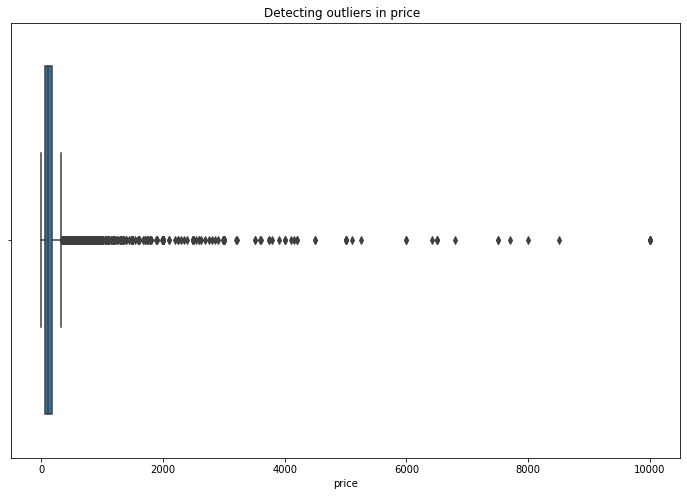

In [15]:
# Box Plot 
plt.figure(figsize=(12,8))
sns.boxplot(df['price'])
plt.title("Detecting outliers in price  ")
plt.show()


Box Plot is showing us the distribution of prices in the data. For dealing with this outliers. We can use Quantile based Flooring and capping

In [16]:
# Percentiles to get 10th and 90th of the overall pricing
print("10th percentile of price: ")
print(df["price"].quantile(0.10))

print("\n90th percentile of price: ")
print(df["price"]. quantile(0.90))

print("\nSkewness of the price attributes: ")
print(df["price"].skew())

10th percentile of price: 
49.0

90th percentile of price: 
269.0

Skewness of the price attributes: 
19.118938995046033


In [17]:
# Changing the price where its below 10 and above 90 percentiles

df.loc[df['price']<49,'price'] = df.loc[df['price']>=49,'price']
df.loc[df['price']>269,'price'] = df.loc[df['price']<=269,'price']
print(df['price'].skew())

0.7149257709633412


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


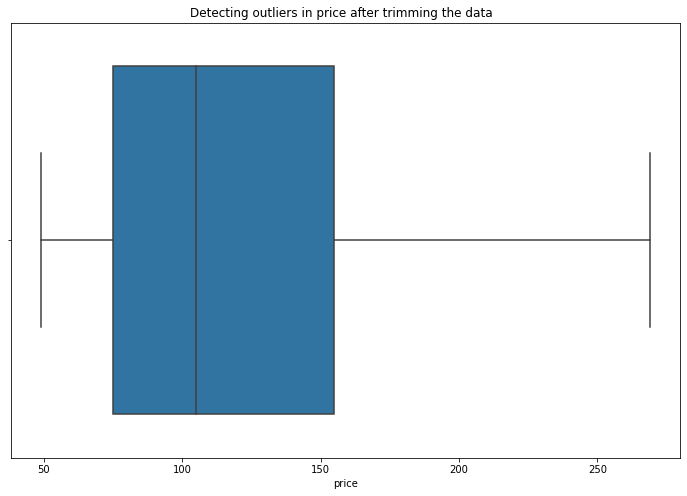

In [18]:
# Box Plot 
plt.figure(figsize=(12,8))
sns.boxplot(df['price'])
plt.title("Detecting outliers in price after trimming the data  ")
plt.show()

# Step 3: Extracting statistics from Dataset

In [19]:
#Getting stats on numerical columns
df.describe()

host_id  ...  availability_365
count  4.889500e+04  ...      48895.000000
mean   6.762001e+07  ...        112.781327
std    7.861097e+07  ...        131.622289
min    2.438000e+03  ...          0.000000
25%    7.822033e+06  ...          0.000000
50%    3.079382e+07  ...         45.000000
75%    1.074344e+08  ...        227.000000
max    2.743213e+08  ...        365.000000

[8 rows x 9 columns]

In [20]:
# installing the pandas profiling
try:
    !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
except BaseException as be:
    print("Please restart runtime",be) 

     | 25.9 MB 799 kB/s
     |████████████████████████████████| 10.9 MB 10.3 MB/s 
     |████████████████████████████████| 596 kB 32.2 MB/s 
     |████████████████████████████████| 102 kB 8.5 MB/s 
     |████████████████████████████████| 675 kB 50.2 MB/s 
     |████████████████████████████████| 4.7 MB 65.0 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 812 kB 40.8 MB/s 
     |████████████████████████████████| 38.1 MB 56.0 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=34a576b94b2fe26090ee20066a8a7b1d582ec6c0ec36dafae0176e1cf2eda084
  Stored in directory: /tmp/pip-ephem-wheel-cache-2llih8b0/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=e2d2035ddcc78b0976ed8854a869c76e5935d61cb2c23922790e57b66a0bbfc4
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b1

In [21]:
# Importing profile report from pandas profiling.
from pandas_profiling import profile_report

In [22]:
# Collecting The Pandas Profile Report.
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Profiling provides us a piece of very basic and useful information about the data without doing any explicit exploratory data analysis. That's what we love about pandas profiling, as we can see in the pandas profiling report it shows the correlation between features, it also shows the number of null values in each features graphically, Basically, pandas profiling tries to cover all the features with their properties.

# Step 4: Exploratory analysis and visualizations

#Let's proceed with examing some interesting categorical unique values


In [23]:
# Unique neighbourhood_group
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [24]:
# Count of Unique neighbourhoods
len(df['neighbourhood'].unique())

221

In [25]:
# Unique room types
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# Lets get which Host ID is having maximum number of hostings 

In [26]:
# Getting host_id and its total hosting counts
top_host = df['host_id'].value_counts()
top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host Id','host_id':'Hosting Counts'})

Host Id  Hosting Counts
0      219517861             327
1      107434423             232
2       30283594             121
3      137358866             103
4       16098958              96
...          ...             ...
37452   23727216               1
37453   89211125               1
37454   19928013               1
37455    1017772               1
37456   68119814               1

[37457 rows x 2 columns]

# Average price for different Neighbourhood Group

In [27]:
 round(df.groupby('neighbourhood_group')['price'].mean().reset_index(),2)

neighbourhood_group   price
0               Bronx   89.46
1            Brooklyn  110.89
2           Manhattan  138.38
3              Queens   97.33
4       Staten Island   96.80

# Average Price for different Room Type

In [28]:
round(df.groupby('room_type')['price'].mean().reset_index(),2)

room_type   price
0  Entire home/apt  151.86
1     Private room   86.13
2      Shared room   85.64

# Top 10 neighbourhoods that have the most listings in them

In [29]:
df['neighbourhood'].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

# Top 5 Hosting having maximum earning

In [30]:
df.groupby('host_id')['price'].sum().sort_values(ascending=False).head(5)

host_id
219517861    52955.0
30283594     19750.0
12243051     18042.0
22541573     16528.0
107434423    15336.0
Name: price, dtype: float64

# 10 Most Reviewed listing in NYC

In [33]:
df.nlargest(10,'number_of_reviews')

name  ...  availability_365
11759                            Room near JFK Queen Bed  ...               333
2031                          Great Bedroom in Manhattan  ...               293
2030                      Beautiful Bedroom in Manhattan  ...               342
2015                        Private Bedroom in Manhattan  ...               339
13495                            Room Near JFK Twin Beds  ...               173
10623                  Steps away from Laguardia airport  ...               163
1879            Manhattan Lux Loft.Like.Love.Lots.Look !  ...               179
20403  Cozy Room Family Home LGA Airport NO CLEANING FEE  ...               341
4870                  Private brownstone studio Brooklyn  ...               269
471                      LG Private Room/Family Friendly  ...                 0

[10 rows x 13 columns]

# Getting Host_id , Total Listing for Particular Id and their Earning

In [51]:
df.groupby(['host_id','calculated_host_listings_count']).sum('price').sort_values(by='calculated_host_listings_count', ascending = False).head(10)

latitude  ...  availability_365
host_id   calculated_host_listings_count               ...                  
219517861 327                             13316.25823  ...             98588
107434423 232                              9451.60418  ...             58884
30283594  121                              4931.41347  ...             37924
137358866 103                              4197.55601  ...             20237
16098958  96                               3912.98277  ...             28063
12243051  96                               3909.55849  ...             26555
61391963  91                               3708.75422  ...             22015
22541573  87                               3545.20322  ...             27159
200380610 65                               2649.19409  ...             21972
1475015   52                               2119.22525  ...             17374

[10 rows x 7 columns]

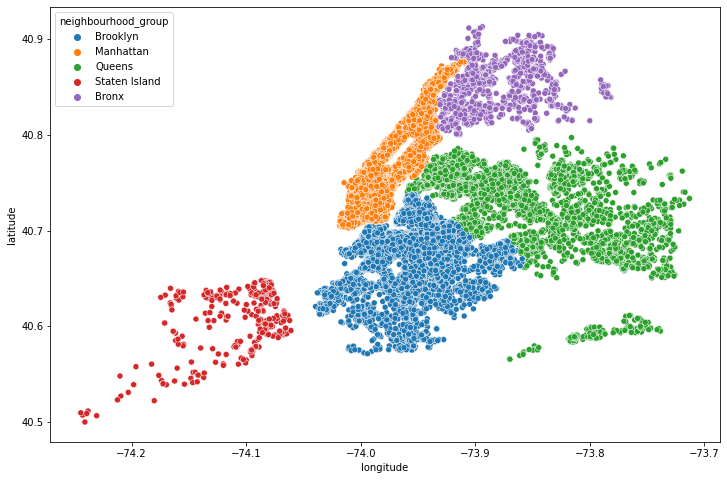

In [62]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="longitude", y="latitude",hue='neighbourhood_group')